In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [7]:
data=pd.read_csv("/home/manikanta/Documents/ML/classification/Random Forest/hcvdat0.csv")

In [8]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [9]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [10]:
data['Category'].value_counts(normalize=True)

0=Blood Donor             0.866667
3=Cirrhosis               0.048780
1=Hepatitis               0.039024
2=Fibrosis                0.034146
0s=suspect Blood Donor    0.011382
Name: Category, dtype: float64

In [11]:
data.shape

(615, 14)

In [16]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Category']= label_encoder.fit_transform(data['Category']) 
data['Category'].unique() 

data['Sex']= label_encoder.fit_transform(data['Sex']) 
data['Sex'].unique() 

array([1, 0])

In [17]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [18]:
data.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,4,59,0,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


<AxesSubplot:xlabel='Category', ylabel='count'>

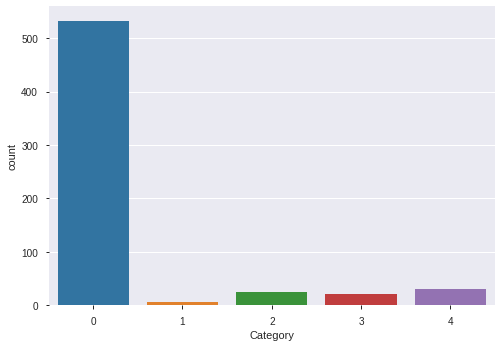

In [19]:
import seaborn as sns
sns.countplot(x='Category',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

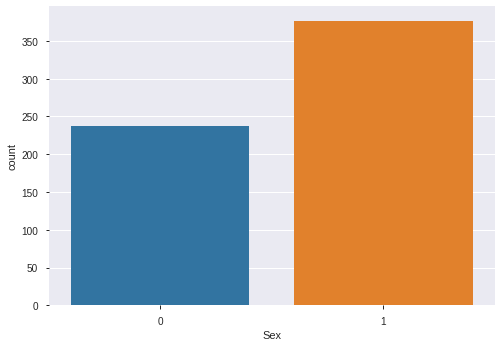

In [20]:
import seaborn as sns
sns.countplot(x='Sex',data=data)

In [21]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [27]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [30]:
data['ALB'].fillna(data['ALB'].mode()[0], inplace=True)
data['ALP'].fillna(data['ALP'].mode()[0], inplace=True)
data['ALT'].fillna(data['ALT'].mode()[0], inplace=True)
data['CHOL'].fillna(data['CHOL'].mode()[0], inplace=True)
data['PROT'].fillna(data['PROT'].mode()[0],inplace=True)

In [31]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [32]:
x=data.drop(['Unnamed: 0', 'Category'],axis=1)
y=data['Category']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()

In [35]:
rclf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
train_score=rclf.score(X_train,y_train)
train_score

1.0

In [39]:
test_score=rclf.score(X_test,y_test)
test_score

0.918918918918919

In [40]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
y_pred = rclf.predict(X_test)
print(len(X_test))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

185
0.918918918918919
[[160   0   0   0   0]
 [  3   0   0   1   0]
 [  2   0   0   2   1]
 [  2   0   1   2   1]
 [  1   0   0   1   8]]


In [41]:
y_pred

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
pred_prob=pd.DataFrame({'Acutual_Data':y_test,'New_data':y_pred})

In [43]:
pred_prob

,Acutual_Data,New_data
49,0,0
496,0,0
211,0,0
249,0,0
142,0,0
...,...,...
481,0,0
26,0,0
571,3,0
333,0,0


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       160
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.33      0.33      0.33         6
           4       0.80      0.80      0.80        10

    accuracy                           0.92       185
   macro avg       0.42      0.43      0.42       185
weighted avg       0.88      0.92      0.90       185



In [47]:
# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rclf, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

/home/manikanta/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Cross-validation scores:[0.95348837 0.95348837 0.88372093 0.90697674 0.88372093 0.90697674
 0.93023256 0.88372093 0.95348837 0.93023256]


In [48]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9186


In [65]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(rclf, out_file=dot_data,  
 #               filled=True, rounded=True,
  #              special_characters=True, feature_names =x,class_names=['0','1','2','3','4'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('model/diabetes1.png')
#Image(graph.create_png())

In [ ]:
#from sklearn import tree
#from sklearn.tree import export_graphviz
#fn=x
#cn=y
#fig, axes = plt.subplots(nrows = 615,ncols = 14,figsize = (4,4), dpi=800)
#tree.plot_tree(rclf.estimators_[0],
 #              feature_names = fn, 
 #              class_names=cn,
  #             filled = True);
#fig.savefig('rf_individualtree.png')